# Assignment 1 :P2P Network Simulation
Generating and developing a random P2P network.
Kindly import the following libraries to run afterwards (You can simply run all cells if you just want to see final result)

In [323]:
import matplotlib.pyplot as plt
import networkx as nx
import random
import queue
import time

The following snippet initializes a random graph with random no of nodes from range LOW to HIGH . (Change the size as you wish)

In [324]:
LOW,HIGH = 50,100

Graph = nx.Graph()
size = random.randint(LOW,HIGH)
colors=[]
for i in range(size):
    Graph.add_node(i)
    colors.append((random.random(),random.random(),random.random()))

In [325]:
def check_connectivity(Graph:list[list]):
    n = len(Graph)
    visited = [False for _ in range(n)]
    q = queue.Queue()
    q.put(0)
    while not q.empty() :
        top = q.get()
        for node in Graph[top]:
            if not visited[node]:
                q.put(node)
                visited[node]=True
    return all(visited)

In [326]:
def generate_edges(Graph:nx.Graph,lower_limit,upper_limit,timeout = 2.0):
    start_time = time.time()
    for node in list(Graph.nodes):
        if Graph.degree[node] > upper_limit:
            Graph.clear_edges()
            generate_edges(Graph,lower_limit,upper_limit)
        
        new_no_edges = random.randint(max(lower_limit-Graph.degree[node],0),upper_limit-Graph.degree[node])
        for _ in range(new_no_edges):
            while True:
                if time.time() - start_time > timeout:
                    print(f"Timeout while generating edges for node {node}")
                    Graph.clear_edges()
                    generate_edges(Graph,lower_limit,upper_limit)
                    return 
                adj_node = random.randint(0,size-1)
                if adj_node != node and Graph.degree[adj_node] < upper_limit:
                    Graph.add_edge(node,adj_node)
                    break


The following snippet generates the graph as desired

In [327]:
#Generating a connected graph for sure 
while not (check_connectivity(Graph) and nx.is_connected(Graph)):
    print("Generated a not connected graph retrying...")
    if (check_connectivity(Graph) != nx.is_connected(Graph)):
        print("Sorry The function never showed an error while testing but is currently misbehaving")
    Graph.clear_edges()
    generate_edges(Graph,3,6)

Generated a not connected graph retrying...


Visualize Graph by playing the below snippet

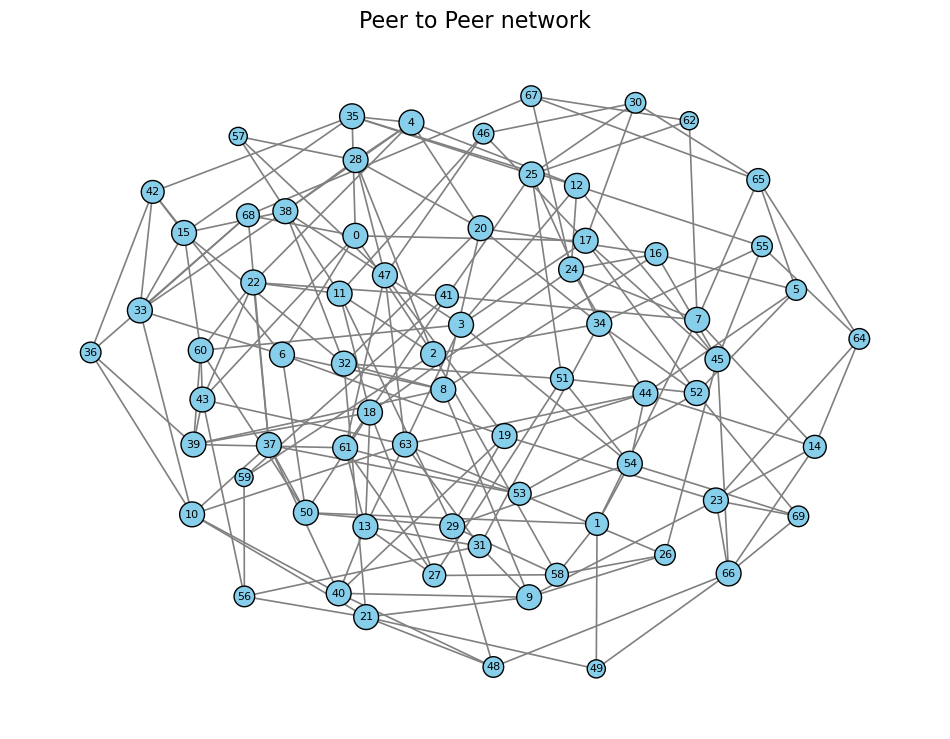

In [328]:
# node_colors = colors
node_colors = "skyblue"

node_sizes = [20 + 50 * Graph.degree(n) for n in Graph.nodes()]
pos = nx.kamada_kawai_layout(Graph)
plt.figure(figsize=(12, 9))

nx.draw_networkx_nodes(Graph, pos,
                        node_color=node_colors,
                        node_size=node_sizes,
                        alpha=1,
                        edgecolors='black', linewidths=1)

nx.draw_networkx_edges(Graph, pos,
                        edge_color='gray',
                        alpha=1,
                        width=1.2)

nx.draw_networkx_labels(Graph, pos,
                        font_size=8,
                        font_color='black')

plt.title("Peer to Peer network", fontsize=16)
plt.axis('off')
plt.savefig("network.png")


In [329]:
Graph.clear_edges()